### Quantum Annealing 

Quantum annealing is a method for finding the optimal solution to problems with many possible solutions by using quantum physics to explore the energy landscape of the problem. It finds the lowest energy state, which corresponds to the optimal solution.

In [2]:
# Import necessary libraries
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit_algorithms import QAOA
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Define a simple optimization problem: Maximize x1 + 2*x2 subject to x1 + x2 <= 1
qp = QuadraticProgram()
qp.binary_var('x1')
qp.binary_var('x2')
qp.maximize(linear={'x1': 1, 'x2': 2})
qp.linear_constraint({'x1': 1, 'x2': 1}, '<=', 1)

<LinearConstraint: x1 + x2 <= 1 'c0'>

In [4]:
# Convert the problem to QUBO form
conv = QuadraticProgramToQubo()
qubo = conv.convert(qp)

In [5]:
# Set up the Aer simulator backend
simulator = AerSimulator()

In [6]:
# Define the QAOA instance
optimizer = COBYLA(maxiter=100)
sampler = Sampler()
qaoa = QAOA(optimizer=optimizer, reps=1, sampler=sampler)

In [7]:
# Create the MinimumEigenOptimizer using QAOA
qaoa_optimizer = MinimumEigenOptimizer(qaoa)

In [8]:
# Solve the optimization problem
result = qaoa_optimizer.solve(qubo)
print(result)

fval=-2.0, x1=0.0, x2=1.0, status=SUCCESS


In [9]:
# Extract the optimal solution
optimal_solution = result.x
print(f"Optimal solution: x1 = {optimal_solution[0]}, x2 = {optimal_solution[1]}")

Optimal solution: x1 = 0.0, x2 = 1.0


In [10]:
# Visualize the final state
# Create the QAOA circuit with optimized parameters
optimal_params = result.min_eigen_solver_result.optimal_point

In [11]:
# Re-create the QAOA circuit with optimal parameters
num_qubits = qubo.get_num_binary_vars()
qaoa_ansatz = QuantumCircuit(num_qubits)
qaoa_ansatz.h(range(num_qubits))
qaoa_ansatz.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)), clbits=())

In [12]:
# Add the QAOA cost Hamiltonian (using a simple example for demonstration)
for i in range(num_qubits):
    qaoa_ansatz.rz(optimal_params[0], i)
qaoa_ansatz.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)), clbits=())

In [13]:
# Add the QAOA mixer Hamiltonian
for i in range(num_qubits):
    qaoa_ansatz.rx(optimal_params[1], i)
qaoa_ansatz.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)), clbits=())

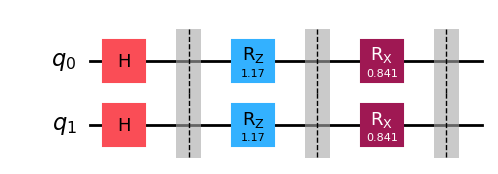

In [14]:
# Transpile and visualize the circuit
qaoa_ansatz = transpile(qaoa_ansatz, simulator)
qaoa_ansatz.draw('mpl')
plt.show()

In [ ]:
# Simulate the final state
# transpiled_circuit = transpile(qaoa_ansatz, simulator)
# final_result = simulator.run(transpiled_circuit, shots=1024).result()
# counts = final_result.get_counts(transpiled_circuit)
# plot_histogram(counts)
# plt.show()
